## Iranian Telecom Churn Rate

#### Problem Statement - To identify the customer churn prediction of Iranian Telecom Company, with highly imbalanced dataset

**Dataset credits** UCI Machine Learning Datasets

Downloaded from here: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data into the dataframe 'df'
df = pd.read_csv("churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


##### General Analysis

In [3]:
df.shape

(3150, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


##### Data Validation

In [6]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

##### Data Visualization and Analysis

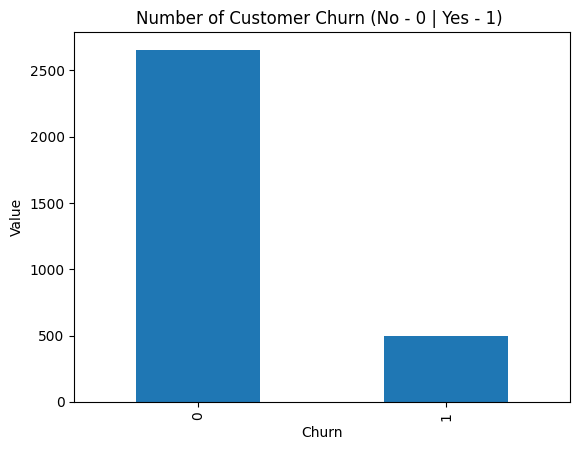

In [7]:
df.Churn.value_counts().plot(kind='bar')
plt.title("Number of Customer Churn (No - 0 | Yes - 1) ")
plt.xlabel("Churn")
plt.ylabel("Value")
plt.show()

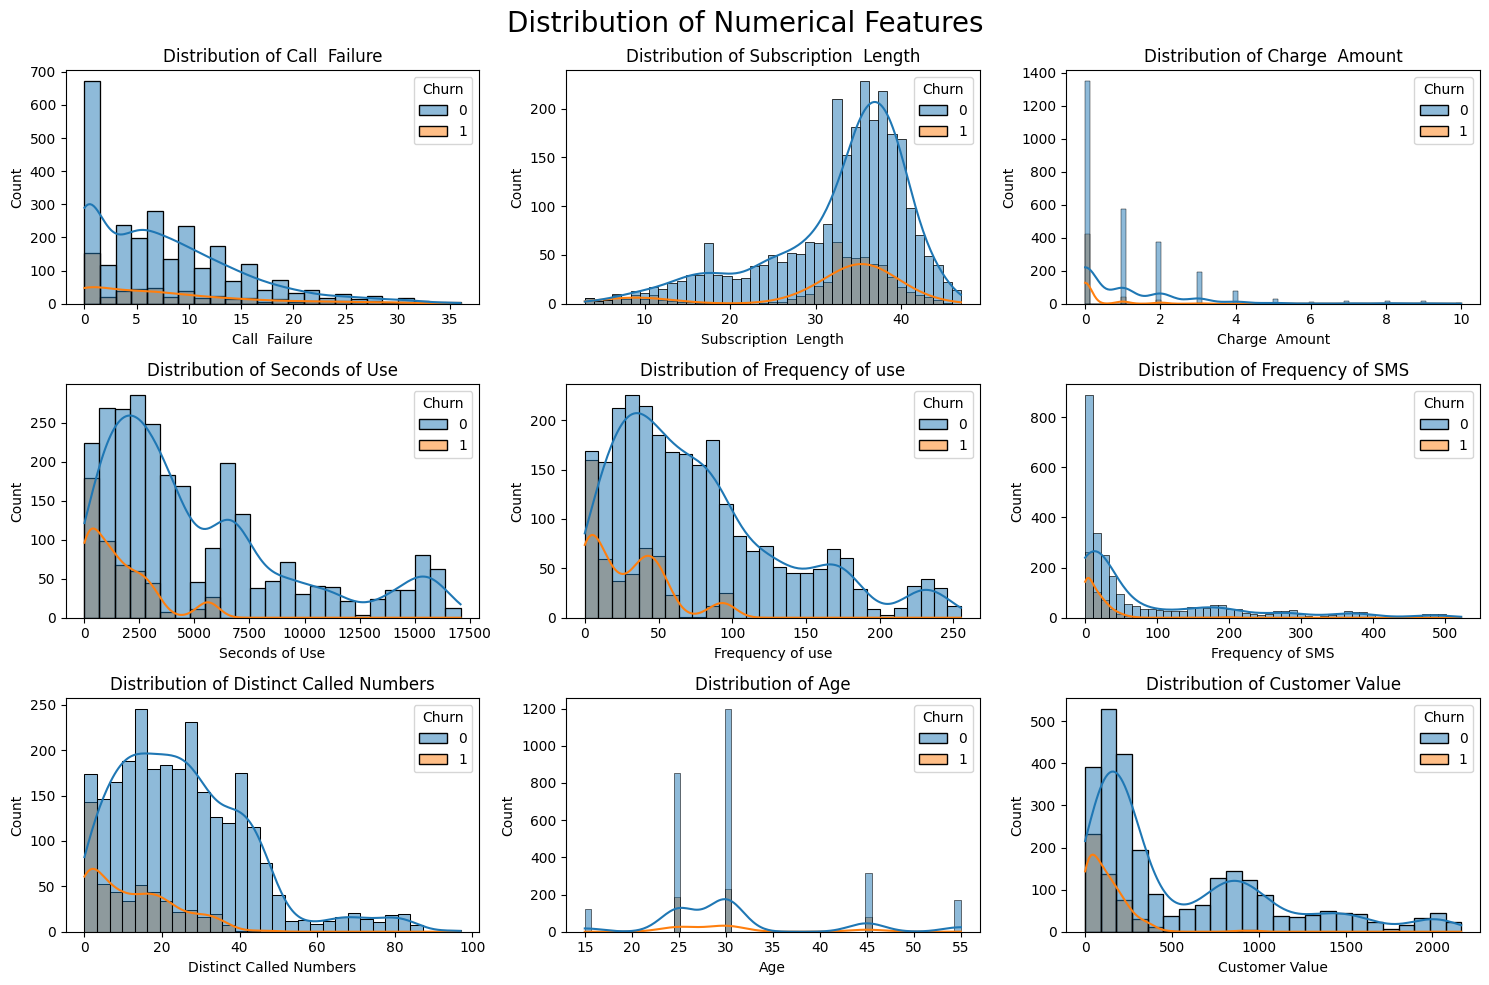

In [8]:
numerical_features = ['Call  Failure', 'Subscription  Length', 'Charge  Amount', 
                     'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
                     'Distinct Called Numbers', 'Age', 'Customer Value']

plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", fontsize=20)
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

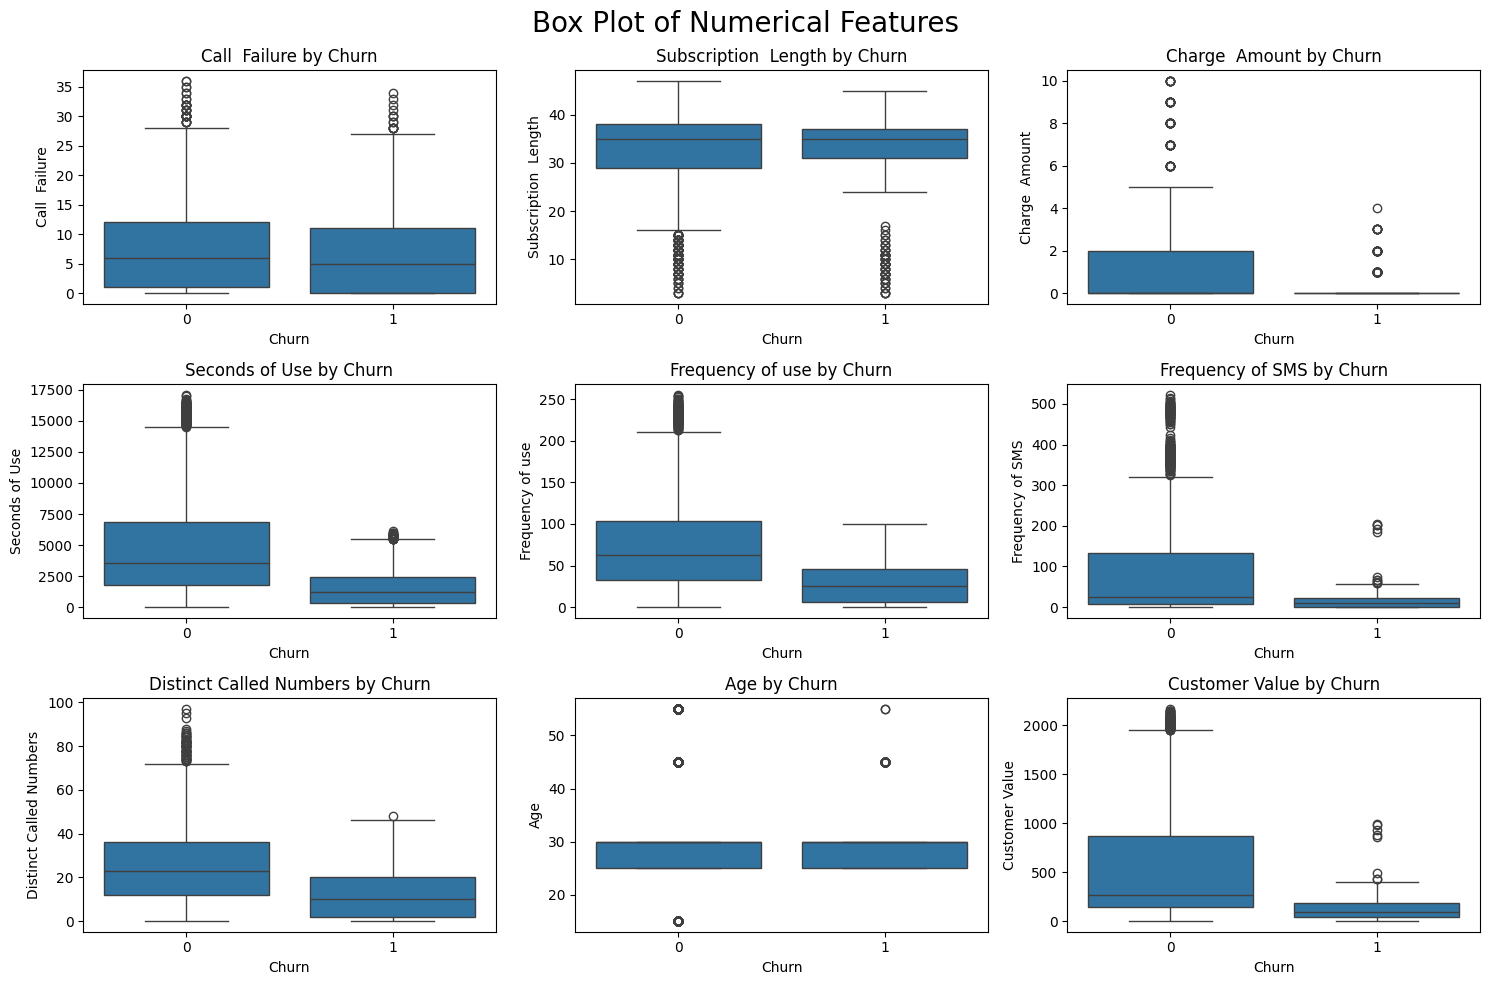

In [9]:
# Box plots for numerical features by Churn
plt.figure(figsize=(15, 10))
plt.suptitle("Box Plot of Numerical Features", fontsize=20)
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'{feature} by Churn')
plt.tight_layout()
plt.show()

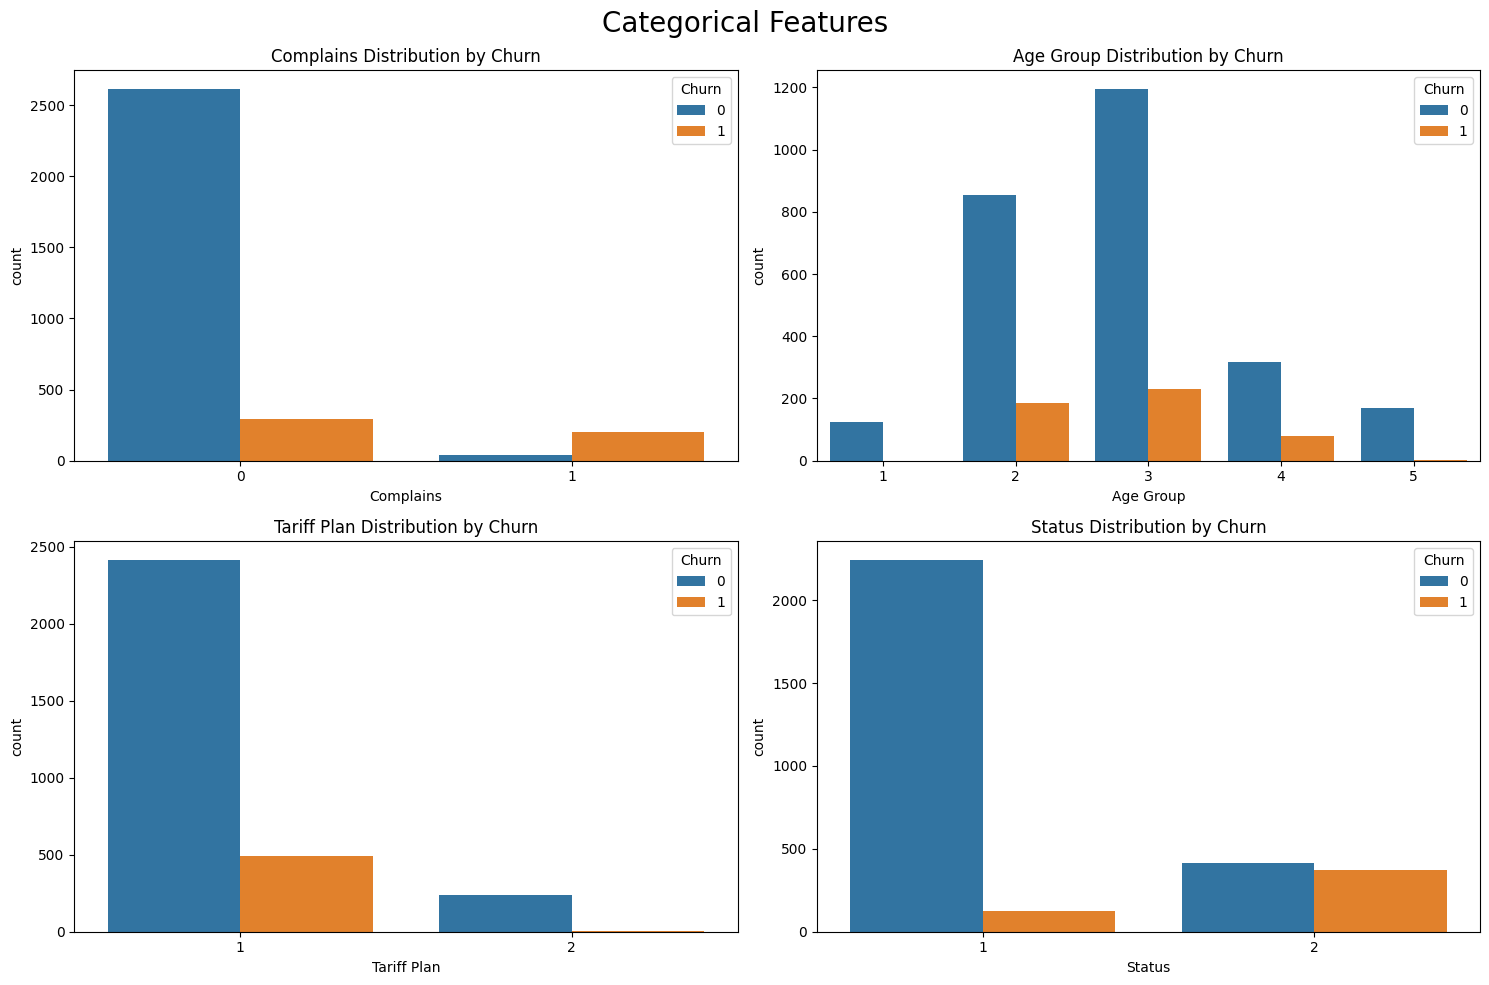

In [10]:
# Categorical features analysis
categorical_features = ['Complains', 'Age Group', 'Tariff Plan', 'Status']

plt.figure(figsize=(15, 10))
plt.suptitle("Categorical Features", fontsize=20)
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'{feature} Distribution by Churn')
plt.tight_layout()
plt.show()

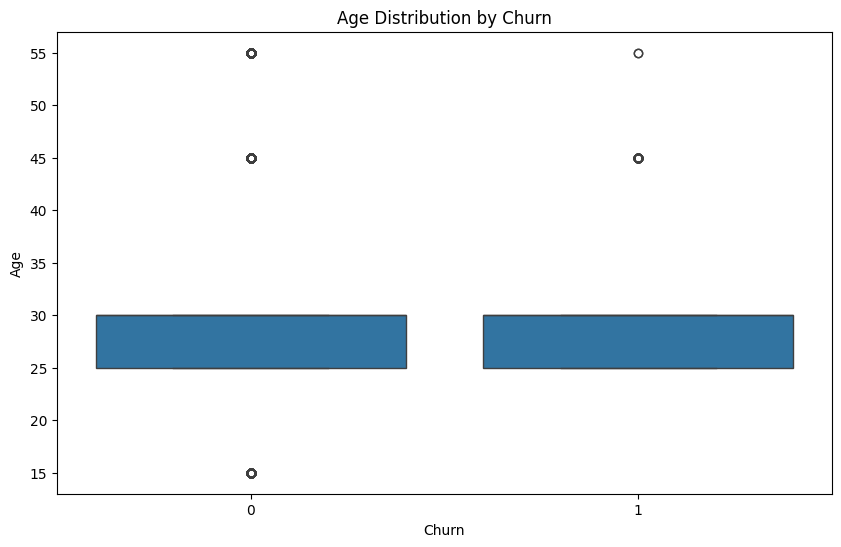

In [11]:
# Age vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Age')
plt.title('Age Distribution by Churn')
plt.show()

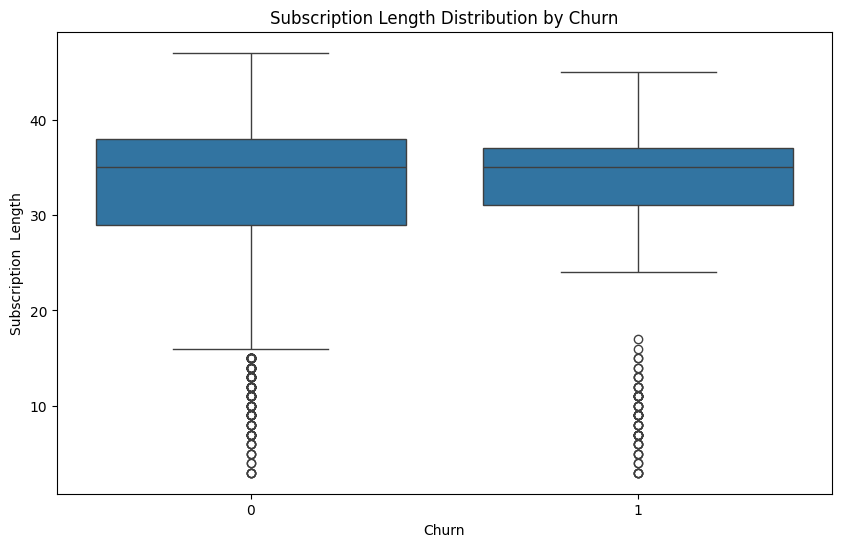

In [12]:
# Subscription Length vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Subscription  Length')
plt.title('Subscription Length Distribution by Churn')
plt.show()

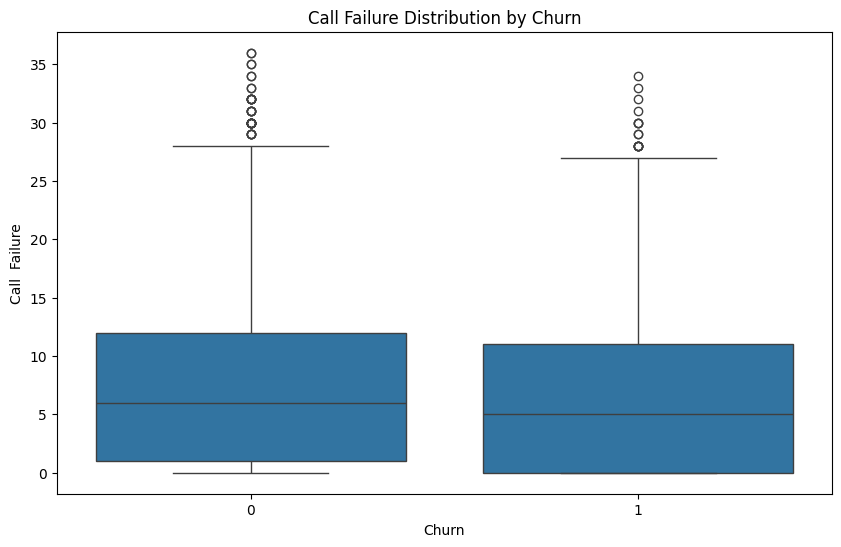

In [13]:
# Call Failure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Call  Failure')
plt.title('Call Failure Distribution by Churn')
plt.show()

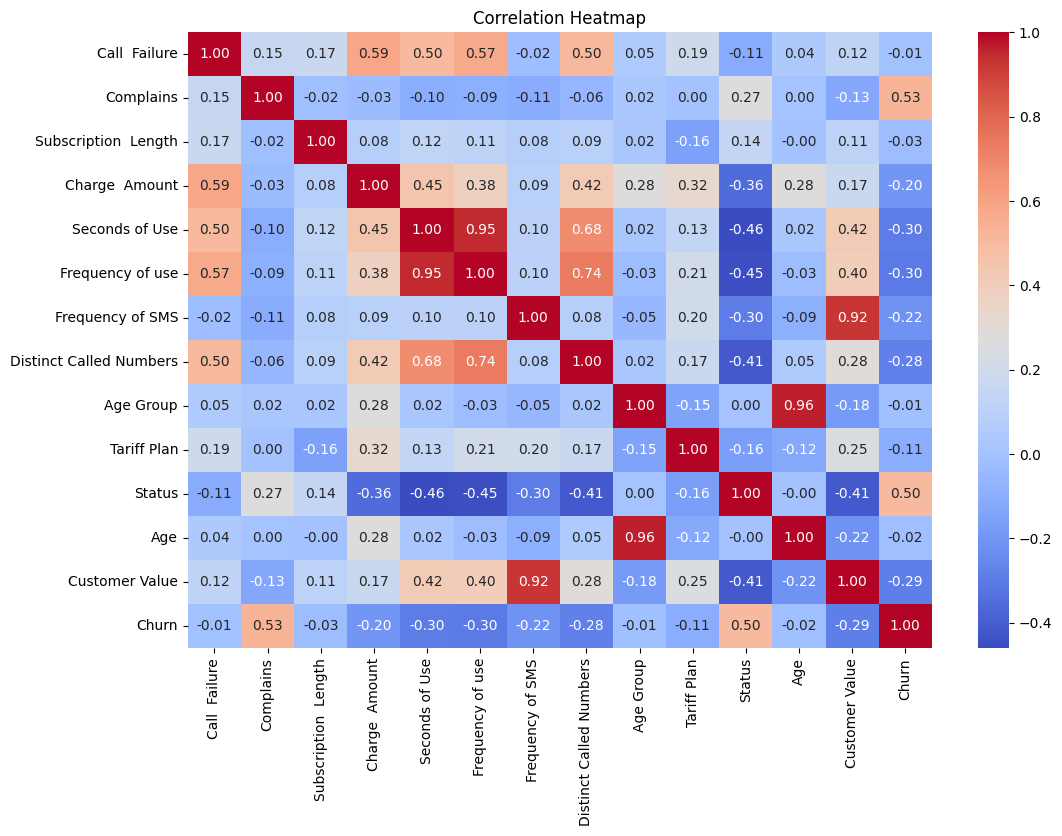

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### Training the Dataset on various models

In [15]:
# Spliting the dataset into train and test
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis = "columns")
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##### Model 1: Logistic Regression

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       531
           1       0.80      0.41      0.55        99

    accuracy                           0.89       630
   macro avg       0.85      0.70      0.74       630
weighted avg       0.88      0.89      0.88       630



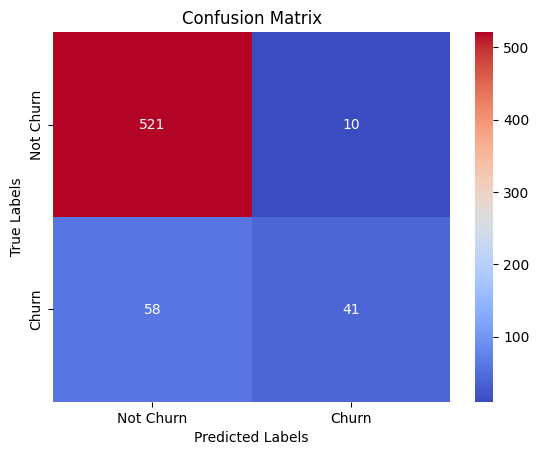

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model_lr = LogisticRegression(max_iter=2000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report for Logistic Regression")
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt = 'd', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### Since the data is highly imbalance, we are not getting the better recall, the model is only be able to identify better for majority class, so to overcome the issue applying Sampling technique - Under Sampling(Not recommended as it will use less data for training, this is only for learning purpose)

##### Model 2: Logistic Regression with Under Sampling

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
y_train_rus.value_counts()

Churn
0    396
1    396
Name: count, dtype: int64

Classification Report for Logistic Regression with Under Sampling
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       531
           1       0.45      0.84      0.58        99

    accuracy                           0.81       630
   macro avg       0.71      0.82      0.73       630
weighted avg       0.88      0.81      0.83       630



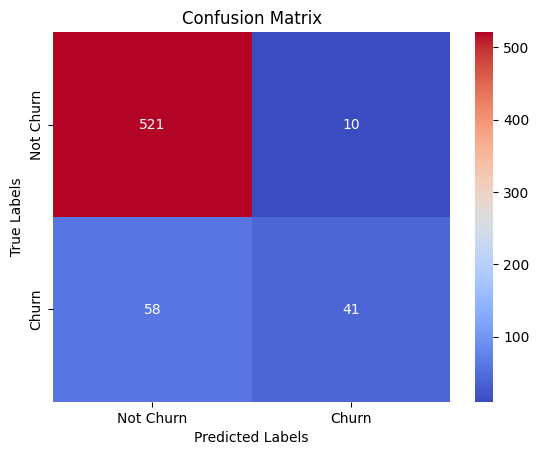

In [18]:
model_lr_rus = LogisticRegression(max_iter=2000)
model_lr_rus.fit(X_train_rus, y_train_rus)

y_pred_rus = model_lr_rus.predict(X_test)
report = classification_report(y_test, y_pred_rus)
print("Classification Report for Logistic Regression with Under Sampling")
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt = 'd', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Applying SMOTE technique to sample the data (Recommended method)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote.value_counts()

Churn
0    2124
1    2124
Name: count, dtype: int64

##### Model 3: Logistic Regression with SMOTE

Classification Report for Logistic Regression with SMOTE
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       531
           1       0.44      0.85      0.58        99

    accuracy                           0.81       630
   macro avg       0.71      0.83      0.73       630
weighted avg       0.88      0.81      0.83       630



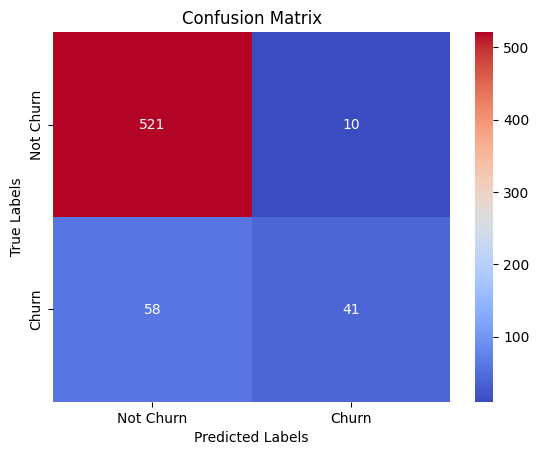

In [20]:
model_lr_smote = LogisticRegression(max_iter=2000)
model_lr_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_lr_smote.predict(X_test)
report = classification_report(y_test, y_pred_smote)
print("Classification Report for Logistic Regression with SMOTE")
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt = 'd', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##### Model 4: Support Vector Machine with SMOTE

Classification Report for Support Vector Machine with SMOTE
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       531
           1       0.29      0.82      0.43        99

    accuracy                           0.65       630
   macro avg       0.62      0.72      0.59       630
weighted avg       0.84      0.65      0.70       630



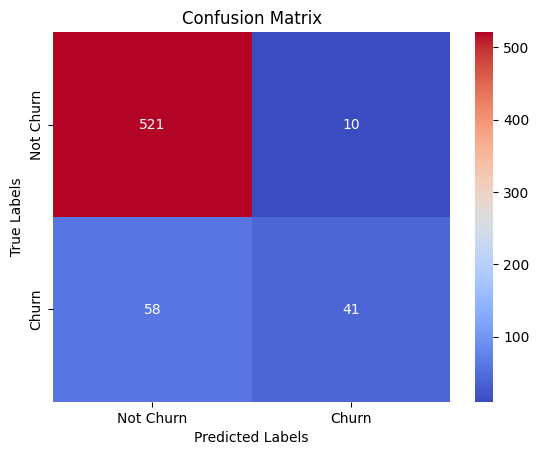

In [21]:
from sklearn.svm import SVC

model_svc_smote = SVC()
model_svc_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_svc_smote.predict(X_test)
report = classification_report(y_test, y_pred_smote)
print("Classification Report for Support Vector Machine with SMOTE")
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt = 'd', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Model 5: Random Forest with SMOTE

Classification Report for Random Forest with SMOTE
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       531
           1       0.83      0.93      0.88        99

    accuracy                           0.96       630
   macro avg       0.91      0.95      0.93       630
weighted avg       0.96      0.96      0.96       630



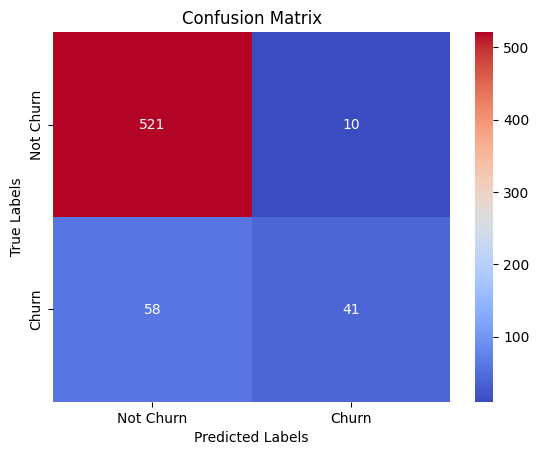

In [22]:
from sklearn.ensemble import RandomForestClassifier

model_rf_smote = RandomForestClassifier(n_estimators=100)
model_rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_rf_smote.predict(X_test)
report = classification_report(y_test, y_pred_smote)
print("Classification Report for Random Forest with SMOTE")
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt = 'd', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Model 6: XGBoost with SMOTE

Classification Report for XGBoost with SMOTE
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       531
           1       0.89      0.95      0.92        99

    accuracy                           0.97       630
   macro avg       0.94      0.96      0.95       630
weighted avg       0.97      0.97      0.97       630



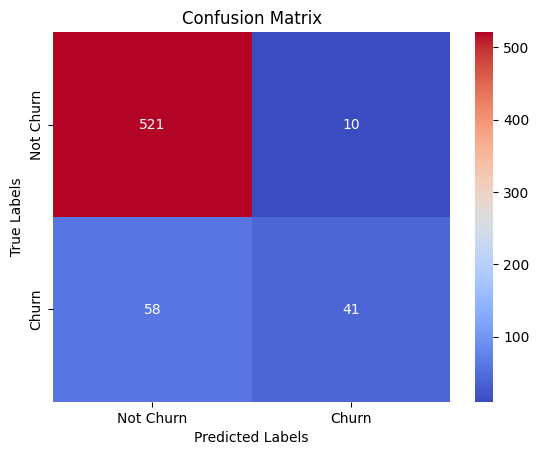

In [23]:
from xgboost import XGBClassifier

model_xgb_smote = XGBClassifier()
model_xgb_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_xgb_smote.predict(X_test)
report = classification_report(y_test, y_pred_smote)
print("Classification Report for XGBoost with SMOTE")
print(report)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt = 'd', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Conclusion

In this classification problem aimed at predicting customer churn, multiple models were trained and evaluated to handle class imbalance and improve prediction accuracy, especially for the minority class (churned customers).

#### Key Takeaways:

- **Logistic Regression** performed well on accuracy (**89%**) but struggled with recall for churned customers (**41%**), highlighting imbalance issues.
- **Under Sampling** and **SMOTE** techniques helped balance the data:
  - **Logistic Regression with SMOTE** achieved **Recall: 85%** and **F1-score: 58%** for the churn class, showing improved minority class detection.
  - **Support Vector Machine (SVM) with SMOTE** improved recall but had low precision and overall lower accuracy.
  - **Random Forest with SMOTE** provided a strong balance, reaching **Accuracy: 96%** and **F1-score: 88%** for churn.
- The best performing model was **XGBoost with SMOTE**, achieving:
  - **Accuracy:** 97%  
  - **Precision:** 89%  
  - **Recall:** 95%  
  - **F1-score:** 92% for churned customers

---

### Final Recommendation

Based on the evaluation metrics, **XGBoost with SMOTE** is the most effective model for this churn prediction task. It maintains excellent performance on both majority and minority classes, making it a robust choice for real-world deployment.